# Practical 3 Solutions

```{solution-start} exploring-df
:label: exploring-df-solution
:class: dropdown
```
1. `df` is a DataFrame object.  One of the ways you could get this is via the `type` function:

In [1]:
import pandas as pd

df = pd.read_csv("data/world-bank-1_data.csv")
type(df)

pandas.core.frame.DataFrame

2.,

In [2]:
# this returns a tuple in the format of (number of rows, number of columns)
df.shape

(3038, 11)

3.,

In [3]:
df.dtypes

country                object
year                    int64
population_m          float64
population_f          float64
population_t          float64
population_density    float64
land_area             float64
life_expectancy_f     float64
life_expectancy_m     float64
life_expectancy_t     float64
co2_emissions_pc      float64
dtype: object

```{solution-end}
```

```{solution-start} slicing-df
:label: slicing-df-solution
:class: dropdown
```
1.

In [4]:
df.iloc[ : , 0:3]

,country,year,population_m
0,Afghanistan,2000,10689508.0
1,Afghanistan,2001,11117754.0
2,Afghanistan,2002,11642106.0
3,Afghanistan,2003,12214634.0
4,Afghanistan,2004,12763726.0
...,...,...,...
3033,Zimbabwe,2016,6674206.0
3034,Zimbabwe,2017,6777054.0
3035,Zimbabwe,2018,6879119.0
3036,Zimbabwe,2019,6983353.0


2.,

In [5]:
df.iloc[0:3]

,country,year,population_m,population_f,population_t,population_density,land_area,life_expectancy_f,life_expectancy_m,life_expectancy_t,co2_emissions_pc
0,Afghanistan,2000,10689508.0,10090449.0,20779957.0,31.859861,652230.0,57.120,54.663,55.841,0.036574
1,Afghanistan,2001,11117754.0,10489238.0,21606992.0,33.127872,652230.0,57.596,55.119,56.308,0.033785
2,Afghanistan,2002,11642106.0,10958668.0,22600774.0,34.651540,652230.0,58.080,55.583,56.784,0.045574


3.,

In [6]:
df.iloc[0]

country               Afghanistan
year                         2000
population_m           10689508.0
population_f           10090449.0
population_t           20779957.0
population_density      31.859861
land_area                652230.0
life_expectancy_f           57.12
life_expectancy_m          54.663
life_expectancy_t          55.841
co2_emissions_pc         0.036574
Name: 0, dtype: object

4.,

In [7]:
#get min and max values of life_expectancy_max
le_min = df["life_expectancy_t"].min()
le_max = df["life_expectancy_t"].max()

# get country with lowest life expectancy
df.loc[df["life_expectancy_t"] == le_min, "country"]

# get country with highest life expectancy
df.loc[df["life_expectancy_t"] == le_max, "country"]

1217    Hong Kong SAR, China
Name: country, dtype: object

5.,

In [8]:
uk_data = df[df["country"] == "United Kingdom"]

# get number of rows and columns from DataFrame - 14 records were returned
uk_data.shape

(14, 11)

6.,

In [9]:
uk_2020 = df[(df["country"] == "United Kingdom") & (df["year"] == 2020)]

# get number of rows and columns from DataFrame - 1 record was returned
uk_2020.shape

(1, 11)

7.,

In [10]:
df[df["country"] == "United Kingdom" & df["year"] == 2020]

TypeError: Cannot perform 'rand_' with a dtyped [int64] array and scalar of type [bool]

```{solution-end}
```


```{solution-start} create-columns
:label: create-columns-solution
:class: dropdown
```

In [11]:
df["population_m_f"] = df["population_m"] / df["population_t"]
df["population_f_f"] = df["population_f"] / df["population_t"]

```{solution-end}
```

```{solution-start} save-df-file
:label: save-df-file-solution
:class: dropdown
```
1.

In [12]:
# Pandas does not have a to_txt() function so we need to adapt the to_csv() method.
df.to_csv("data/world-bank-1_data.txt", sep="\t")

3.,

In [13]:
df2 = pd.read_csv("data/world-bank-1_data.txt", sep="\t")
df2.head()

,Unnamed: 0,country,year,population_m,population_f,population_t,population_density,land_area,life_expectancy_f,life_expectancy_m,life_expectancy_t,co2_emissions_pc,population_m_f,population_f_f
0,0,Afghanistan,2000,10689508.0,10090449.0,20779957.0,31.859861,652230.0,57.120,54.663,55.841,0.036574,0.514414,0.485586
1,1,Afghanistan,2001,11117754.0,10489238.0,21606992.0,33.127872,652230.0,57.596,55.119,56.308,0.033785,0.514544,0.485456
2,2,Afghanistan,2002,11642106.0,10958668.0,22600774.0,34.651540,652230.0,58.080,55.583,56.784,0.045574,0.515120,0.484880
3,3,Afghanistan,2003,12214634.0,11466237.0,23680871.0,36.307546,652230.0,58.578,56.056,57.271,0.051518,0.515802,0.484198
4,4,Afghanistan,2004,12763726.0,11962963.0,24726689.0,37.910996,652230.0,59.093,56.542,57.772,0.041655,0.516192,0.483808


```{solution-end}
```


```{solution-start} highlight_scatter
:label: highlight_scatter-solution
:class: dropdown
```

/var/folders/sz/n8rnbx3134g78k44vpsr7s340000gn/T/ipykernel_56226/2089022769.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


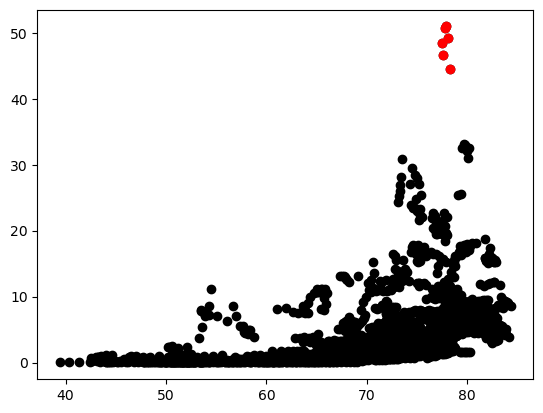

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# extract records where co2_emissions_pc are > 40
highlight = df[df["co2_emissions_pc"] > 40]

# extract columns to represent x and y axis for plot
x = df["life_expectancy_t"].to_numpy()
y = df["co2_emissions_pc"].to_numpy()
x_highlight = highlight["life_expectancy_t"].to_numpy()
y_highlight = highlight["co2_emissions_pc"].to_numpy()

# first plot all the points as black points
ax.scatter(x, y, c="black")

#the plot the points present in highlight in red
ax.scatter(x_highlight, y_highlight, c="red")

fig.show()

```{solution-end}
```